📌 Step 1: Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
import joblib

📌 Step 2: Load Dataset

In [3]:
# Load California housing data
cali = fetch_california_housing()
X = pd.DataFrame(cali.data, columns=cali.feature_names)
y = pd.Series(cali.target, name="MedianHouseValue")

# Save to CSV for portability
df = pd.concat([X, y], axis=1)
df.to_csv("../data/cali_housing.csv", index=False)

print(df.head())

   MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0  8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
1  8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
2  7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   
3  5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85   
4  3.8462      52.0  6.281853   1.081081       565.0  2.181467     37.85   

   Longitude  MedianHouseValue  
0    -122.23             4.526  
1    -122.22             3.585  
2    -122.24             3.521  
3    -122.25             3.413  
4    -122.25             3.422  


📌 Step 3: Exploratory Data Analysis (EDA)

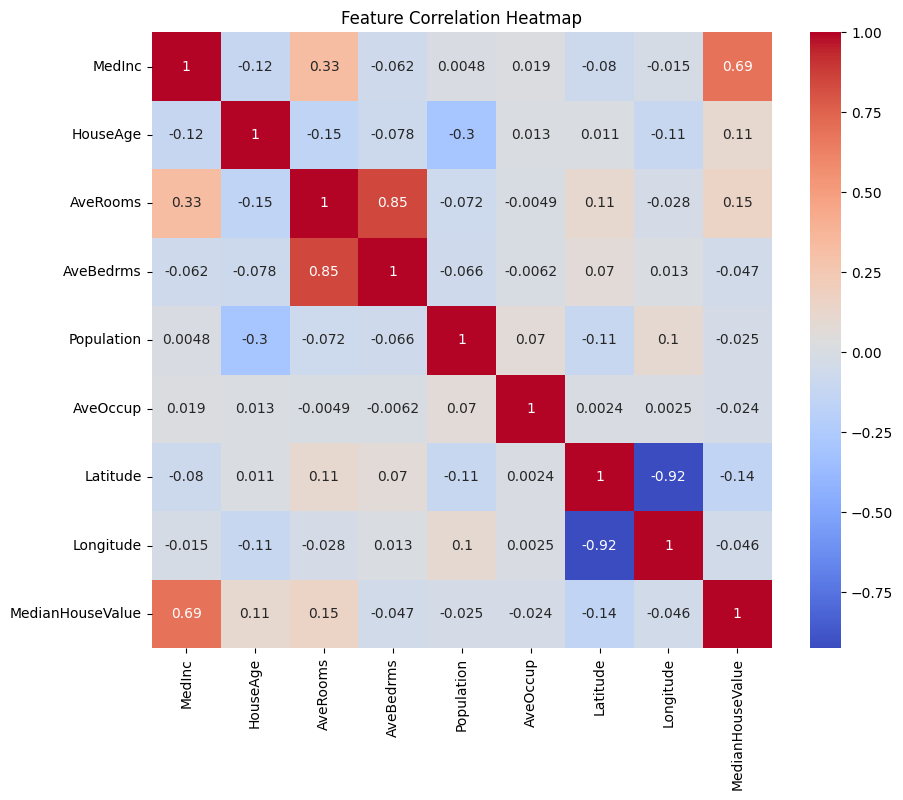

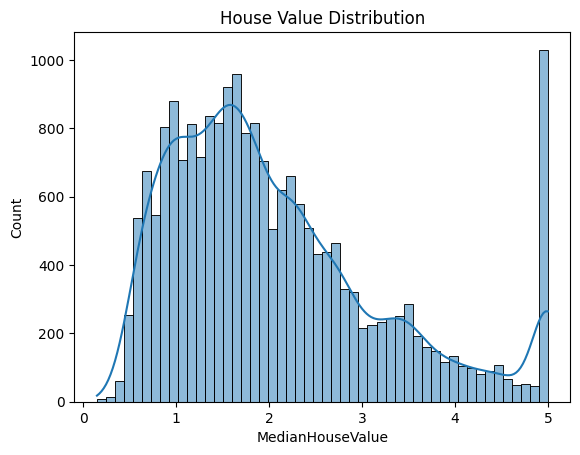

In [4]:
# Correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm")
plt.title("Feature Correlation Heatmap")
plt.show()

# Target distribution
sns.histplot(df["MedianHouseValue"], bins=50, kde=True)
plt.title("House Value Distribution")
plt.show()

📌 Step 4: Preprocessing

In [5]:
X = df.drop("MedianHouseValue", axis=1)
y = df["MedianHouseValue"]

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

📌 Step 5: Train-Test Split

In [6]:
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42
)

📌 Step 6: Train the Model

In [7]:
model = LinearRegression()
model.fit(X_train, y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


📌 Step 7: Evaluate the Model

Mean Squared Error: 0.56
R^2 Score: 0.58


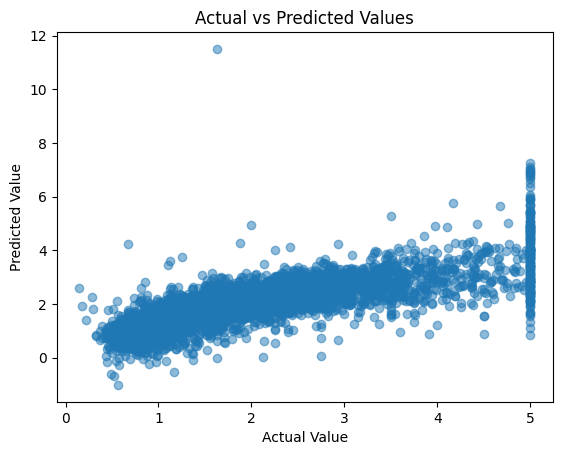

In [9]:
y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse:.2f}")
print(f"R^2 Score: {r2:.2f}")

# Scatter plot
plt.scatter(y_test, y_pred, alpha=0.5)
plt.xlabel("Actual Value")
plt.ylabel("Predicted Value")
plt.title("Actual vs Predicted Values")
plt.savefig("../outputs/results.png")
plt.show()

📌 Step 8: Save the Model

In [10]:
joblib.dump(model, "../outputs/model.pkl")

['../outputs/model.pkl']

📌 Step 9: requirements.txt

pandas  
numpy  
matplotlib  
seaborn  
scikit-learn  
joblib  